# Market Size  

***Bottom Up***

---


## Market Sizing Approach

To estimate the potential market size, we use a bottom-up approach based on the number of **electoral districts** (*Wahlbezirke*) involved in an election.

A electoral district is an administrative unit used to organize the voting process. There are two types of electoral district in Germany:

- **Polling station districts** (*Urnenwahlbezirke*), where voters cast their ballots in person at an assigned polling station.
- **Postal voting districts** (*Briefwahlbezirke*), where postal votes are collected and counted.

Each eligible voter is assigned to both a polling station district and a postal voting district.

For our calculation, we assume a service fee of **€50 per electoral district**. By multiplying the total number of districts by this fee, we can derive a realistic estimate of the addressable market per election.


### Data Basis and Analysis Scope

We begin by analyzing publicly available election results from the states of **Berlin** ([wahlen-berlin.de](https://www.wahlen-berlin.de/)) and **Brandenburg** ([wahlergebnisse.brandenburg.de](https://wahlergebnisse.brandenburg.de/)).

For each dataset, we examine the following attributes:
- **Type of electoral district**: differentiating between *postal voting districts* (Briefwahlbezirke) and *polling station districts* (Urnenwahlbezirke),
- **Size of the district**: i.e., the number of eligible voters or ballots cast,
- **Type of election**: such as European Parliament elections, federal (Bundestag) elections, and others.
- **State**: either Berlin or Brandenburg.

This analysis forms the basis for estimating the number of electoral districts across different election types.


In [39]:
import json
import pandas as pd


with open('source.json') as file:
    source = json.load(file)

electoral_district = pd.DataFrame(columns=['typ', 'size', 'election', 'state'])
for entry in source:
    temp = pd.read_excel(entry['filename'], sheet_name=entry['sheetname'])
    temp = temp[entry['columns']]
    temp['election'] = entry['election']
    temp['state'] = entry['state']

    columns = {source_column_name: target_column_name for source_column_name, target_column_name in zip(temp.columns, electoral_district.columns)}
    temp = temp.rename(columns=columns)

    electoral_district = pd.concat([electoral_district, temp])


electoral_district = electoral_district.replace({'typ': {'W': 'Urnenwahlbezirk', 'B': 'Briefwahlbezirk'}})
electoral_district = electoral_district.loc[electoral_district['typ'] == 'Urnenwahlbezirk']

electoral_district.head()

,typ,size,election,state
0,Urnenwahlbezirk,864,BU - BB,Brandenburg
1,Urnenwahlbezirk,924,BU - BB,Brandenburg
2,Urnenwahlbezirk,703,BU - BB,Brandenburg
3,Urnenwahlbezirk,412,BU - BB,Brandenburg
4,Urnenwahlbezirk,307,BU - BB,Brandenburg


np.float64(826.4348352930616)

### Visualizing District Size Distribution

Next, we plot the data to visualize the distribution of electoral district sizes. This helps us understand how district sizes vary by:

- **Type of election** (e.g., European, federal),
- **State** (Berlin or Brandenburg).

These visualizations provide insights into typical district sizes and outliers, which are relevant for estimating workload, resource needs, and service pricing.


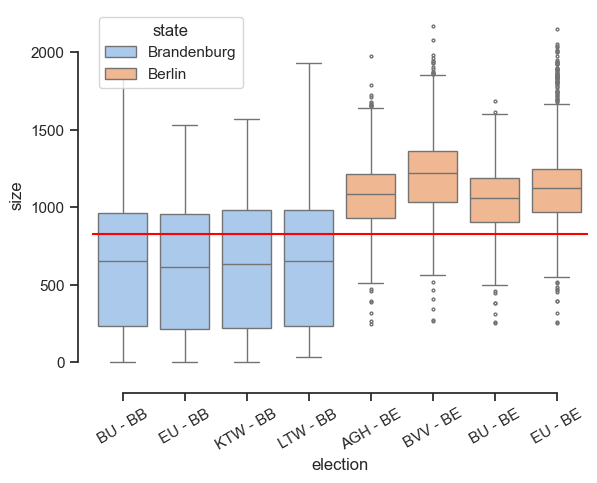

In [89]:
import seaborn as sns
import matplotlib.pyplot as plt 

sns.set_theme(style="ticks", palette="pastel")


graph = sns.boxplot(
    x='election',
    y='size',
    hue='state',
    data=electoral_district,
    fliersize=2
)

sns.despine(offset=10, trim=True)

graph.set_xticklabels(graph.get_xticklabels(), rotation=30)
graph.axhline(
    y=electoral_district.loc[:, 'size'].mean(), 
    label='mean',
    color='red'
    )

### Estimating Electoral Districts Based on Population

The visualizations reveal a clear difference in electoral district size between urban areas (e.g., Berlin) and rural regions (e.g., Brandenburg). While the **type of region** significantly influences district size, the **type of election** (e.g., federal, European) has only a minor effect and can be considered negligible for this purpose.

To estimate the number of electoral districts based on population, we use the **average number of eligible voters per district** as a conversion factor. Our analysis shows that, on average, one electoral district corresponds to approximately **800 eligible voters**.

For the number of eligible voters, we refer to the official figures from the **2025 federal election (Bundestagswahl)**, which represent the most up-to-date nationwide data. According to the Federal Election Officer, **60,510,631** people were eligible to vote in that election ([source](https://www.bundeswahlleiterin.de/bundestagswahlen/2025/ergebnisse/bund-99.html#stimmentabelle14)).

We note that this figure excludes some younger voters who are eligible in certain elections (e.g., from age 16 in European or local elections). However, we consider this deviation negligible for the purpose of high-level market estimation.

Using this approach, the total number of electoral districts in Germany can be approximated by dividing the number of eligible voters by mean size of electorial districts.


In [103]:
number_of_eligible_voters = 60_510_631
mean_electoral_district_size = electoral_district.loc[:, 'size'].mean()
price_per_electoral_district = 50
service_fee = round(number_of_eligible_voters / mean_electoral_district_size * price_per_electoral_district / 1_000_000, 1)

print(f'Service fee ~ €{service_fee}M')

Service fee ~ €3.7M
